In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def nn_predictor(x, X):
    m = 10
    mi = 0
    for i in range(30):
        dist = np.linalg.norm(x-X[i])
        if dist < m:
            m = dist
            mi = i
    return np.sin(10*X[mi])

In [3]:
def compute_rmse(y_pred, y):
    return (sum((y_pred-y)**2)/len(y))**0.5

In [4]:
def knn_predictor(k, x, X):
    dist = np.array([np.linalg.norm(x-X[i]) for i in range(len(X))])
    m = np.ones(k)
    mi = np.array([0 for k in range(k)])
    for i in range(k):
        for j in range(30):
            if dist[j] < m[i]:
                m[i] = dist[j]
                mi[i] = j
        dist[mi[i]] = 1
    return np.mean([np.sin(10*X[i]) for i in mi])

In [5]:
def compute_weight(p, x, mi, X):
    down = [np.exp(-(np.linalg.norm(x-X[i])/np.power(p,2))) for i in mi]
    return down

In [6]:
def soft_knn_predictor(p, k, x, X):
    dist = np.array([np.linalg.norm(x-X[i]) for i in range(len(X))])
    m = np.ones(k)
    mi = np.array([0 for k in range(k)])
    for i in range(k):
        for j in range(30):
            if dist[j] < m[i]:
                m[i] = dist[j]
                mi[i] = j
        dist[mi[i]] = 1
    W = compute_weight(p, x, mi, X)
    w = [i/sum(W) for i in W]
    return np.sum([w[i]*np.sin(10*X[mi[i]]) for i in range(k)])

In [7]:
X = np.random.rand(30)

In [8]:
sample = np.array([(k-1)/499 for k in np.arange(500)])

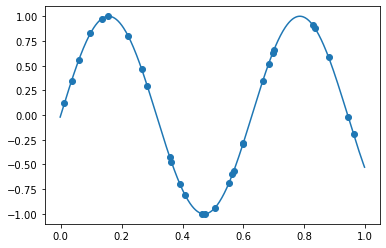

In [9]:
plt.ion()
plt.scatter(X, [np.sin(10*i) for i in X])
plt.plot([(k-1)/ 499 for k in range(500)], [np.sin(10*(k-1)/499) for k in range(500)])

Text(0.5, 1.0, 'RMSE=0.11961067376956618')

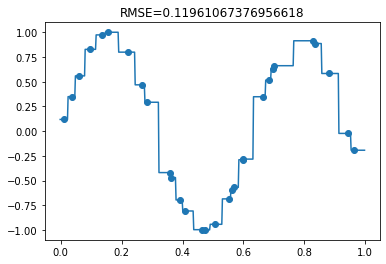

In [10]:
plt.scatter(X, [np.sin(10*i) for i in X])
plt.plot(sample, np.array([nn_predictor(i, X) for i in sample]))
rmse = compute_rmse(np.array([nn_predictor(i, X) for i in sample]),[np.sin(10*(k-1)/499) for k in range(500)] )
plt.title("RMSE=" + str(rmse))

Text(0.5, 1.0, 'RMSE=0.1296964539490733')

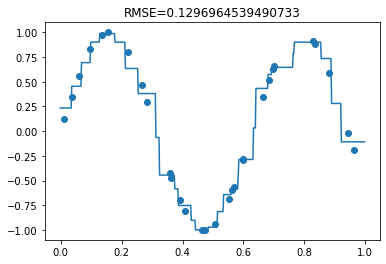

In [11]:
plt.scatter(X, [np.sin(10*i) for i in X])
plt.plot(sample, [knn_predictor(2, i, X) for i in sample])
rmse = compute_rmse(np.array([knn_predictor(2,i, X) for i in sample]),[np.sin(10*(k-1)/499) for k in range(500)] )
plt.title("RMSE=" + str(rmse))

Text(0.5, 1.0, 'RMSE=0.1632926140193497')

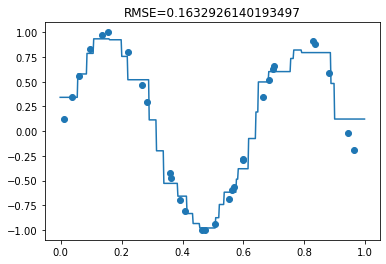

In [12]:
plt.scatter(X, [np.sin(10*i) for i in X])
plt.plot(sample, [knn_predictor(3, i, X) for i in sample])
rmse = compute_rmse(np.array([knn_predictor(3,i, X) for i in sample]),[np.sin(10*(k-1)/499) for k in range(500)] )
plt.title("RMSE=" + str(rmse))

Text(0.5, 1.0, 'RMSE=0.11961067376956618')

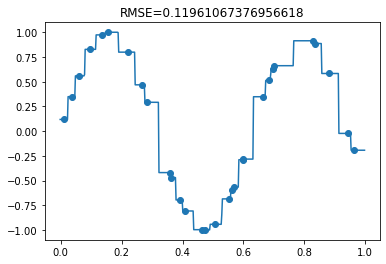

In [13]:
p = np.sqrt(0.0001)
plt.scatter(X, [np.sin(10*i) for i in X ])
plt.plot(sample, [soft_knn_predictor(p,3,i,X) for i in sample])
rmse = compute_rmse(np.array([soft_knn_predictor(p,1,i,X) for i in sample]),[np.sin(10*(k-1)/499) for k in range(500)] )
plt.title("RMSE=" + str(rmse))

Text(0.5, 1.0, 'RMSE=0.11853156632361184')

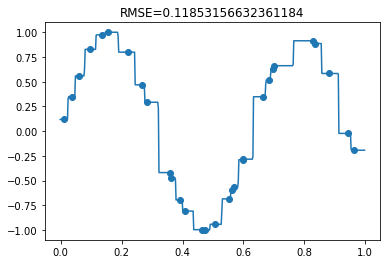

In [14]:
p = np.sqrt(0.0003)
plt.scatter(X, [np.sin(10*i) for i in X ])
plt.plot(sample, [soft_knn_predictor(p,3,i,X) for i in sample])
rmse = compute_rmse(np.array([soft_knn_predictor(p,3,i,X) for i in sample]),[np.sin(10*(k-1)/499) for k in range(500)] )
plt.title("RMSE=" + str(rmse))

Text(0.5, 1.0, 'RMSE=0.11531719857200712')

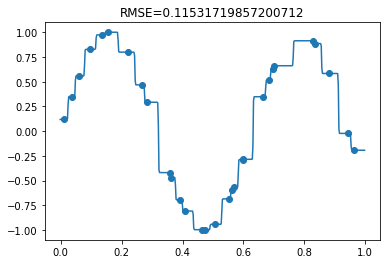

In [15]:
p = np.sqrt(0.001)
plt.scatter(X, [np.sin(10*i) for i in X ])
plt.plot(sample, [soft_knn_predictor(p,3,i,X) for i in sample])
rmse = compute_rmse(np.array([soft_knn_predictor(p,3,i,X) for i in sample]),[np.sin(10*(k-1)/499) for k in range(500)] )
plt.title("RMSE=" + str(rmse))

Text(0.5, 1.0, 'RMSE=0.10863399466561037')

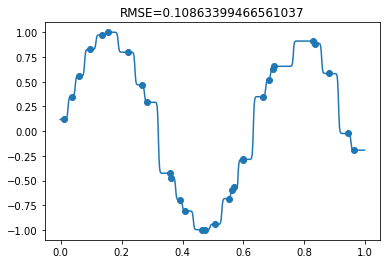

In [16]:
p = np.sqrt(0.003)
plt.scatter(X, [np.sin(10*i) for i in X ])
plt.plot(sample, [soft_knn_predictor(p,3,i,X) for i in sample])
rmse = compute_rmse(np.array([soft_knn_predictor(p,3,i,X) for i in sample]),[np.sin(10*(k-1)/499) for k in range(500)] )
plt.title("RMSE=" + str(rmse))

Text(0.5, 1.0, 'RMSE=0.09943619550451972')

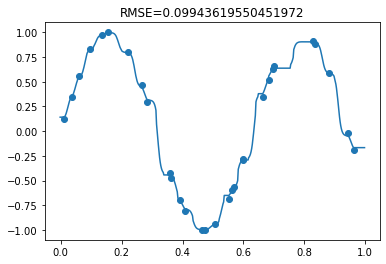

In [17]:
p = np.sqrt(0.01)
plt.scatter(X, [np.sin(10*i) for i in X ])
plt.plot(sample, [soft_knn_predictor(p,3,i,X) for i in sample])
rmse = compute_rmse(np.array([soft_knn_predictor(p,3,i,X) for i in sample]),[np.sin(10*(k-1)/499) for k in range(500)] )
plt.title("RMSE=" + str(rmse))